In [42]:
"""
Do not change the input and output format.
If our script cannot run your code or the format is improper, your code will not be graded.

The only functions you need to implement in this template is linear_regression_noreg, regularized_linear_regression,
tune_lambda, and test_error.
"""

import numpy as np
import pandas as pd

###### Q4.1 ######
def linear_regression_noreg(X, y):
    """
    Compute the weight parameter given X and y.
    Inputs:
    - X: A numpy array of shape (num_samples, D) containing feature.
    - y: A numpy array of shape (num_samples, ) containing label
    Returns:
    - w: a numpy array of shape (D, )
  """
    #####################################################
    ## w~* = (X~^t X~)^-1 X~^t y
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    #####################################################		 
    return w

###### Q4.2 ######
def regularized_linear_regression(X, y, lambd):
    """
      Compute the weight parameter given X, y and lambda.
      Inputs:
      - X: A numpy array of shape (num_samples, D) containing feature.
      - y: A numpy array of shape (num_samples, ) containing label
      - lambd: a float number containing regularization strength
      Returns:
      - w: a numpy array of shape (D, )
    """
    ####################################################
    ## w~* = (X~^t X~ + lambd I)^-1 X~^t y
    w = np.linalg.inv(X.T @ X + lambd * np.eye(X.shape[1])) @ X.T @ y
    #####################################################
    return w

###### Q4.3 ######
def tune_lambda(Xtrain, ytrain, Xval, yval, lambds):
    """
    Find the best lambda value.
    Inputs:
    - Xtrain: A numpy array of shape (num_training_samples, D) containing training feature.
    - ytrain: A numpy array of shape (num_training_samples, ) containing training label
    - Xval: A numpy array of shape (num_val_samples, D) containing validation feature.
    - yval: A numpy array of shape (num_val_samples, ) containing validation label
    - lambds: a list of lambdas
    Returns:
    - bestlambda: the best lambda you find in lambds
    """
    #####################################################
    ##
    w = regularized_linear_regression(Xtrain, ytrain, lambds[0])
    
    # err = test_error(w, Xval,yval) * yval.shape[0] + lambds[0] * np.linalg.norm(w,2)**2
    err = test_error(w, Xval,yval) * yval.shape[0] 
    bestlambda = lambds[0]
    for lambd in lambds[1:]:
        w_temp = regularized_linear_regression(Xtrain, ytrain, lambd)
        #err_temp = test_error(w_temp, Xval, yval) * yval.shape[0] + lambd * np.linalg.norm(w_temp,2)**2
        err_temp = test_error(w_temp, Xval, yval) * yval.shape[0] 
        if err > err_temp:
            err = err_temp
            bestlambda = lambd
    #####################################################
    return bestlambda

###### Q4.4 ######
def test_error(w, X, y):
    """
      Compute the mean squre error on test set given X, y, and model parameter w.
      Inputs:
      - X: A numpy array of shape (num_samples, D) containing test feature.
      - y: A numpy array of shape (num_samples, ) containing test label
      - w: a numpy array of shape (D, )
      Returns:
      - err: the mean square error
    """
    #####################################################
    ## err = ||X*w -y||_2^2 / N
    err = (np.linalg.norm(X @ w - y,2))**2 / y.shape[0]
    #####################################################
    return err


"""
NO MODIFICATIONS below this line.
You should only write your code in the above functions.
"""

def data_processing():
    white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';').values

    [N, d] = white.shape

    np.random.seed(3)
    # prepare data
    ridx = np.random.permutation(N)
    ntr = int(np.round(N * 0.8))
    nval = int(np.round(N * 0.1))
    ntest = N - ntr - nval

  # spliting training, validation, and test

    Xtrain = np.hstack([np.ones([ntr, 1]), white[ridx[0:ntr], 0:-1]])

    ytrain = white[ridx[0:ntr], -1]
  
    Xval = np.hstack([np.ones([nval, 1]), white[ridx[ntr:ntr + nval], 0:-1]])
    yval = white[ridx[ntr:ntr + nval], -1]

    Xtest = np.hstack([np.ones([ntest, 1]), white[ridx[ntr + nval:], 0:-1]])
    ytest = white[ridx[ntr + nval:], -1]
    return Xtrain, ytrain, Xval, yval, Xtest, ytest


def main():
    np.set_printoptions(precision=3)
    Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing()
    # =========================Q3.1 linear_regression=================================
    w = linear_regression_noreg(Xtrain, ytrain)
    print("======== Question 3.1 Linear Regression ========")
    print("dimensionality of the model parameter is ", len(w), ".", sep="")
    print("model parameter is ", np.array_str(w))
  
    # =========================Q3.2 regularized linear_regression=====================
    lambd = 5.0
    wl = regularized_linear_regression(Xtrain, ytrain, lambd)
    print("\n")
    print("======== Question 3.2 Regularized Linear Regression ========")
    print("dimensionality of the model parameter is ", len(wl), sep="")
    print("lambda = ", lambd, ", model parameter is ", np.array_str(wl), sep="")

    # =========================Q3.3 tuning lambda======================
    lambds = [0, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 1, 10, 10 ** 2]
    bestlambd = tune_lambda(Xtrain, ytrain, Xval, yval, lambds)
    print("\n")
    print("======== Question 3.3 tuning lambdas ========")
    print("tuning lambda, the best lambda =  ", bestlambd, sep="")

    # =========================Q3.4 report mse on test ======================
    wbest = regularized_linear_regression(Xtrain, ytrain, bestlambd)
    mse = test_error(wbest, Xtest, ytest)
    print("\n")
    print("======== Question 3.4 report MSE ========")
    print("MSE on test is %.3f" % mse)
    
if __name__ == "__main__":
    main()

======== Question 3.1 Linear Regression ========
dimensionality of the model parameter is 12.
model parameter is  [ 2.166e+02  1.145e-01 -1.824e+00 -1.065e-02  1.037e-01  1.546e-01
  3.416e-03  2.347e-04 -2.173e+02  8.348e-01  7.366e-01  1.153e-01]


======== Question 3.2 Regularized Linear Regression ========
dimensionality of the model parameter is 12
lambda = 5.0, model parameter is [ 6.324e-01 -2.854e-02 -1.641e+00 -3.577e-02  2.803e-02 -1.362e-01
  5.259e-03 -8.421e-04  5.888e-01  2.887e-01  4.162e-01  3.768e-01]


======== Question 3.3 tuning lambdas ========
tuning lambda, the best lambda =  0.001


======== Question 3.4 report MSE ========
MSE on test is 0.512


In [2]:
np.set_printoptions(precision=3)
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing()

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(Xtrain, ytrain)

print("%.3e" %reg.intercept_)
print(reg.coef_)
mse = mean_squared_error(yval, reg.predict(Xval))
#((yval - np.mean(yval)).T @ (yval - np.mean(yval))) * (1 - reg.score(Xval, yval)) / len(yval)
print("MSE on test is %.3f" %mse)

2.166e+02
[ 0.000e+00  1.145e-01 -1.824e+00 -1.065e-02  1.037e-01  1.546e-01
  3.416e-03  2.347e-04 -2.173e+02  8.348e-01  7.366e-01  1.153e-01]
MSE on test is 0.640


In [33]:

reg5 = linear_model.Ridge(alpha = 5, solver= 'sparse_cg')
reg5.fit(Xtrain, ytrain)

print("%.3e" %reg5.intercept_)
print(reg5.coef_)
mse = ((ytest - np.mean(ytest)).T @ (ytest - np.mean(ytest))) * (1 - reg5.score(Xtest, ytest)) / len(ytest)
mse2 = mean_squared_error(ytest, reg5.predict(Xtest))
print("MSE on test is %.3f" %mse)
print("MSE2 on test is %.3f" %mse2)

2.083e+00
[ 0.000e+00 -5.288e-02 -1.657e+00  6.523e-03  2.648e-02 -9.028e-02
  5.088e-03 -8.602e-04 -7.248e-03  1.011e-01  4.378e-01  3.677e-01]
MSE on test is 0.523
MSE2 on test is 0.523


In [30]:
reg5 = linear_model.Ridge(alpha = 5, solver= 'auto')
reg5.fit(Xtrain, ytrain)

print("%.3e" %reg5.intercept_)
print(reg5.coef_)
mse = mean_squared_error(ytest, reg5.predict(Xtest))
print("MSE on test is %.3f" %mse)

2.013e+00
[ 0.000e+00 -4.843e-02 -1.665e+00 -4.073e-02  2.662e-02 -2.139e-01
  5.114e-03 -8.499e-04 -3.606e-02  1.356e-01  4.113e-01  3.669e-01]
MSE on test is 0.523


In [36]:
reg04 = linear_model.Ridge(alpha = 10 ** -4, solver= 'auto')
reg04.fit(Xtrain, ytrain)

print("%.3e" %reg04.intercept_)
print(reg04.coef_)
mse = mean_squared_error(ytest, reg04.predict(Xtest))
print("MSE on test is %.3f" %mse)

1.930e+02
[ 0.000e+00  9.633e-02 -1.832e+00 -1.690e-02  9.526e-02  5.634e-02
  3.561e-03  1.355e-04 -1.934e+02  7.563e-01  7.044e-01  1.430e-01]
MSE on test is 0.506


In [37]:
reg03 = linear_model.Ridge(alpha = 10 ** -3, solver= 'auto')
reg03.fit(Xtrain, ytrain)

print("%.3e" %reg03.intercept_)
print(reg03.coef_)
mse = mean_squared_error(ytest, reg03.predict(Xtest))
print("MSE on test is %.3f" %mse)

9.803e+01
[ 0.000e+00  2.329e-02 -1.865e+00 -4.207e-02  6.122e-02 -3.391e-01
  4.145e-03 -2.637e-04 -9.720e+01  4.399e-01  5.748e-01  2.545e-01]
MSE on test is 0.510


In [38]:
reg02 = linear_model.Ridge(alpha = 10 ** -2, solver= 'auto')
reg02.fit(Xtrain, ytrain)

print("%.3e" %reg02.intercept_)
print(reg02.coef_)
mse = mean_squared_error(ytest, reg02.predict(Xtest))
print("MSE on test is %.3f" %mse)

1.816e+01
[ 0.000e+00 -3.814e-02 -1.891e+00 -6.324e-02  3.258e-02 -6.682e-01
  4.637e-03 -5.999e-04 -1.627e+01  1.740e-01  4.657e-01  3.483e-01]
MSE on test is 0.517


In [29]:
reg01 = linear_model.Ridge(alpha = 10 ** -1, solver= 'auto')
reg01.fit(Xtrain, ytrain)

print("%.3e" %reg01.intercept_)
print(reg01.coef_)
mse = mean_squared_error(ytest, reg01.predict(Xtest))
print("MSE on test is %.3f" %mse)

3.822e+00
[ 0.000e+00 -4.907e-02 -1.892e+00 -6.697e-02  2.745e-02 -6.913e-01
  4.733e-03 -6.648e-04 -1.747e+00  1.269e-01  4.454e-01  3.653e-01]
MSE on test is 0.519


In [39]:
reg10 = linear_model.Ridge(alpha = 10, solver= 'auto')
reg10.fit(Xtrain, ytrain)

print("%.3e" %reg10.intercept_)
print(reg10.coef_)
mse = mean_squared_error(ytest, reg10.predict(Xtest))
print("MSE on test is %.3f" %mse)

1.962e+00
[ 0.000e+00 -4.763e-02 -1.477e+00 -1.713e-02  2.620e-02 -1.380e-01
  5.408e-03 -9.770e-04 -1.812e-02  1.401e-01  3.836e-01  3.643e-01]
MSE on test is 0.526


In [40]:
reg100 = linear_model.Ridge(alpha = 100, solver= 'auto')
reg100.fit(Xtrain, ytrain)

print("%.3e" %reg100.intercept_)
print(reg100.coef_)
mse = mean_squared_error(ytest, reg100.predict(Xtest))
print("MSE on test is %.3f" %mse)

2.124e+00
[ 0.    -0.045 -0.49   0.038  0.023 -0.027  0.007 -0.002 -0.002  0.1
  0.172  0.344]
MSE on test is 0.563


In [41]:
reg1 = linear_model.Ridge(alpha = 1, solver= 'auto')
reg1.fit(Xtrain, ytrain)

print("%.3e" %reg1.intercept_)
print(reg1.coef_)
mse = mean_squared_error(ytest, reg1.predict(Xtest))
print("MSE on test is %.3f" %mse)

2.226e+00
[ 0.000e+00 -4.958e-02 -1.849e+00 -6.413e-02  2.694e-02 -4.720e-01
  4.818e-03 -7.123e-04 -1.777e-01  1.268e-01  4.368e-01  3.679e-01]
MSE on test is 0.520


In [17]:
lambds = [0, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 1, 10, 10 ** 2]
er_xtr = [.0] * len(lambds)
er_xts = [.0] * len(lambds)
er_xva = [.0] * len(lambds)

i = 0
for lambd in lambds:
    er_xtr[i] = test_error(regularized_linear_regression(Xtrain, ytrain, lambd), Xtrain, ytrain)
    er_xva[i] = test_error(regularized_linear_regression(Xtrain, ytrain, lambd), Xval, yval)
    er_xts[i] = test_error(regularized_linear_regression(Xtrain, ytrain, lambd), Xtest, ytest)
    i += 1

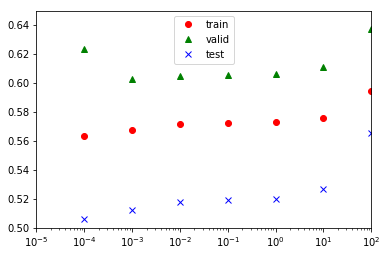

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lambds, er_xtr, linestyle='None', marker = 'o', c='red',label='train')
ax.plot(lambds, er_xva, linestyle='None', marker = '^', c='green',label='valid')
ax.plot(lambds, er_xts, linestyle='None', marker = 'x', c='blue',label='test')

ax.set_xscale("log", nonposx='clip')
ax.set_xlim([10 ** -5,100])
ax.set_ylim([0.5, 0.65])
ax.legend()
#fig.show()

In [24]:
er_xts

[0.5059612161256328,
 0.5062494742112124,
 0.5123889217717633,
 0.5182468131765503,
 0.519291916850227,
 0.520066897448439,
 0.5268225912478837,
 0.5658262938613322]

In [95]:
np.mean([1,2])

1.5

In [26]:
regularized_linear_regression(Xtrain, ytrain, 0.1)

array([ 1.918e+00, -4.917e-02, -1.891e+00, -6.736e-02,  2.690e-02,
       -6.796e-01,  4.754e-03, -6.731e-04,  1.301e-01,  1.310e-01,
        4.432e-01,  3.681e-01])